In [82]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))
import statsmodels.api as sm
import statsmodels.formula.api as sf 
from matplotlib import pyplot as plt
import seaborn as sb

In [3]:
import chi2
import Allogit

In [4]:
col_base=["삶의 사다리 점수",'(가)건강 만족도','(나)가족의 수입 만족도','(다)주거 환경 만족도','(라)가족관계 만족도','(마)직업 만족도','(바)사회적 친분관계 만족도','(사)여가생활 만족도']
col_sub=["성별","연령","교육수준",'근로유형']
D=pd.read_excel("./카테고리_소분류완료.xlsx",usecols=col_base+col_sub)

In [5]:
data=pd.DataFrame(D)

In [6]:
data

,근로유형,삶의 사다리 점수,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,성별,교육수준,연령
0,4,6,2,1,3,3,2,3,3,2,4,78
1,1,5,2,4,4,4,4,4,4,1,3,75
2,1,4,5,2,4,2,4,4,3,1,7,81
3,1,4,2,2,3,2,3,2,2,2,3,83
4,4,9,4,2,4,2,4,3,4,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...
3329,1,8,4,4,4,4,4,4,4,2,3,80
3330,1,9,4,4,4,4,4,4,3,2,3,80
3331,1,5,3,4,4,3,3,3,3,2,2,87
3332,1,8,4,3,4,4,4,4,4,2,3,80


In [8]:
def trans(x):
    if 0 <= x < 57:
        return 1
    elif 57 <= x < 74:
        return 2
    elif 74 <= x < 82:
        return 3 
    else:
        return 4

In [9]:
data['연령_구분'] = data['연령'].apply(trans)

In [10]:
data

,근로유형,삶의 사다리 점수,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,성별,교육수준,연령,연령_구분
0,4,6,2,1,3,3,2,3,3,2,4,78,3
1,1,5,2,4,4,4,4,4,4,1,3,75,3
2,1,4,5,2,4,2,4,4,3,1,7,81,3
3,1,4,2,2,3,2,3,2,2,2,3,83,4
4,4,9,4,2,4,2,4,3,4,1,3,59,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,1,8,4,4,4,4,4,4,4,2,3,80,3
3330,1,9,4,4,4,4,4,4,3,2,3,80,3
3331,1,5,3,4,4,3,3,3,3,2,2,87,4
3332,1,8,4,3,4,4,4,4,4,2,3,80,3


In [72]:
data['근로유형'].value_counts()

근로유형
4    1652
1    1330
2     352
Name: count, dtype: int64

### 전체

In [11]:
전체 = Allogit.Lgt(data)

Optimization terminated successfully.
         Current function value: 0.541904
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.652613
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.652670
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.652935
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.653686
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.654799
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.517124
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.517368
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.518016
         Iterations 6


#### 중상위

In [12]:
result=pd.merge(전체["중상위"][0].params.to_frame(),전체["중상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("중상위","coef"),("중상위","pvalue")])),inplace=True)
print('평균:',전체["중상위"][1])
result

평균: 6.116076784643071


,"(중상위, coef)","(중상위, pvalue)"
const,-9.622729,2.632948e-118
(가)건강 만족도,0.371857,4.696007e-16
(나)가족의 수입 만족도,0.274914,8.439821e-07
(다)주거 환경 만족도,0.257816,6.280581e-04
(라)가족관계 만족도,0.403394,1.122983e-07
(마)직업 만족도,0.308263,2.348552e-05
(바)사회적 친분관계 만족도,0.621741,4.665250e-14
(사)여가생활 만족도,0.461951,1.115545e-11


#### 최상위

In [13]:
result=pd.merge(전체["최상위"][0].params.to_frame(),전체["최상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최상위","coef"),("최상위","pvalue")])),inplace=True)
print('평균:',전체["최상위"][1])
result

평균: 7.824647887323944


,"(최상위, coef)","(최상위, pvalue)"
const,-3.760402,1.134329e-13
(가)건강 만족도,0.248874,5.358255e-05
(라)가족관계 만족도,0.277623,7.146349e-03
(마)직업 만족도,0.572275,1.182699e-08


#### 최하위

In [14]:
result=pd.merge(전체["최하위"][0].params.to_frame(),전체["최하위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최하위","coef"),("최하위","pvalue")])),inplace=True)
print('평균:',전체["최하위"][1])
result

평균: 4.848484848484849


,"(최하위, coef)","(최하위, pvalue)"
const,-5.554574,2.784895e-43
(가)건강 만족도,0.458175,1.272288e-12
(나)가족의 수입 만족도,0.383834,1.112127e-06
(다)주거 환경 만족도,0.276803,1.061060e-03
(라)가족관계 만족도,0.527065,6.739643e-10
(사)여가생활 만족도,0.474266,6.586727e-08


***************

### 성별

In [84]:
data[data['성별'] ==1].describe()

,근로유형,삶의 사다리 점수,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,성별,교육수준,연령,연령_구분
count,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.0,1157.000000,1157.000000,1157.000000
mean,2.237684,6.322385,3.312014,3.118410,3.533276,3.788245,3.392394,3.668971,3.313742,1.0,5.186690,58.134831,1.932584
std,1.397488,1.833170,0.981826,0.896349,0.666791,0.729459,0.699637,0.686131,0.723500,0.0,1.465189,18.736171,1.036839
min,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,2.000000,21.000000,1.000000
25%,1.000000,5.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.0,4.000000,42.000000,1.000000
50%,1.000000,6.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.0,5.000000,59.000000,2.000000
75%,4.000000,8.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.0,7.000000,73.000000,2.000000
max,4.000000,10.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,1.0,7.000000,101.000000,4.000000


In [85]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10,7)

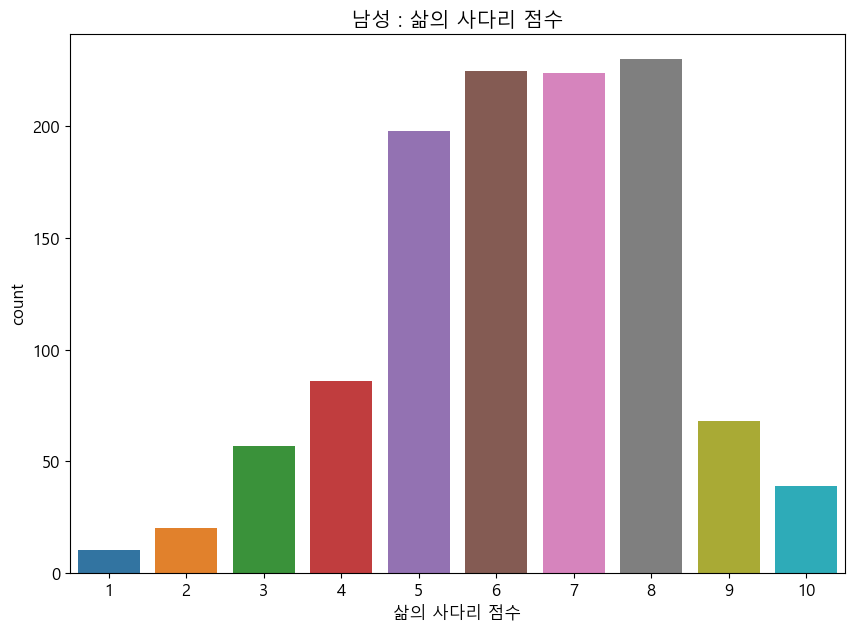

In [88]:
plt.figure()
sb.countplot(data=data[data['성별'] ==1], x='삶의 사다리 점수')
plt.title('남성 : 삶의 사다리 점수')
plt.show()
plt.close()

In [129]:
data[data['성별'] ==2].describe()

,근로유형,삶의 사다리 점수,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,성별,교육수준,연령,연령_구분
count,2177.000000,2177.000000,2177.000000,2177.000000,2177.000000,2177.000000,2177.000000,2177.000000,2177.000000,2177.0,2177.000000,2177.000000,2177.000000
mean,2.780432,6.006431,2.759761,3.001837,3.586587,3.786863,3.335324,3.597611,3.212678,2.0,3.603583,72.773542,2.843362
std,1.403948,1.816731,0.946975,0.819117,0.616832,0.639215,0.672194,0.673660,0.713103,0.0,1.464797,16.599734,1.052742
min,1.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.000000,20.000000,1.000000
25%,1.000000,5.000000,2.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.0,3.000000,68.000000,2.000000
50%,4.000000,6.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,2.0,3.000000,78.000000,3.000000
75%,4.000000,7.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.0,4.000000,84.000000,4.000000
max,4.000000,10.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,2.0,7.000000,101.000000,4.000000


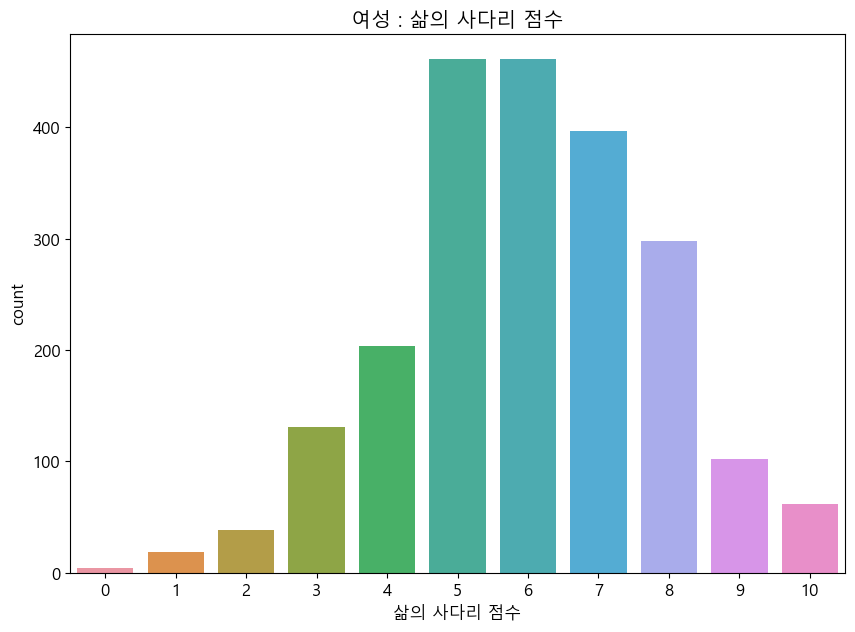

In [89]:
plt.figure()
sb.countplot(data=data[data['성별'] ==2], x='삶의 사다리 점수')
plt.title('여성 : 삶의 사다리 점수')
plt.show()
plt.close()

#### 성별과 삶의 사다리 점수간의 연관성

In [40]:
# 카이제곱검정(독립성)
chi2.chi2_try(data[["삶의 사다리 점수",'성별']])["Pass"][0]["pvalue"]

8.518074850606034e-05

> pass -> 독립적이다.

##### 성별 삶의 사다리 점수간의 관계

> 분석방법 : <br>
회귀계수의 pvalue가 0.05보다 높으면 높은 순으로 해당 column을 제거하고 다시 분석 <br>
만약 남은 column은 최소 2개를 유지

In [41]:
# 모듈 적용
성별 = Allogit.Lgt(data, '성별')

Optimization terminated successfully.
         Current function value: 0.549138
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.654511
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.654547
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.654914
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.655388
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.656727
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.658909
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.523871
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.523871
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.524941
  

#### 남자(성별1) 의 삶의 만족도


|구분|기준(평균)|유효독립변수|
|---|----|----|
|최상위|7.86|직업만족도, 사회적친분관계만족도|
|중상위|6.32|건강만족도, 가족수입만족도, 가족관계만족도, 직업만족도, 사회적친분관계만족도, 여가생활만족도|
|최하위|4.87|건강만족도, 가족수입만족도, 가족관계만족도, 직업만족도, 여가생활만족도|

중상위

In [45]:
result=pd.merge(성별[1]["중상위"][0].params.to_frame(),성별[1]["중상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("중상위","coef"),("중상위","pvalue")])),inplace=True)
print('평균:',성별[1]["중상위"][1])
result

평균: 6.32238547968885


,"(중상위, coef)","(중상위, pvalue)"
const,-9.584380,7.203701e-51
(가)건강 만족도,0.389251,3.133086e-06
(나)가족의 수입 만족도,0.341571,2.709757e-04
(라)가족관계 만족도,0.505360,2.982049e-05
(마)직업 만족도,0.264722,3.444675e-02
(바)사회적 친분관계 만족도,0.620785,1.692580e-05
(사)여가생활 만족도,0.596090,3.482843e-07


최상위

In [46]:
result=pd.merge(성별[1]["최상위"][0].params.to_frame(),성별[1]["최상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최상위","coef"),("최상위","pvalue")])),inplace=True)
print('평균:',성별[1]["최상위"][1])
result

평균: 7.86096256684492


,"(최상위, coef)","(최상위, pvalue)"
const,-3.367925,0.000014
(마)직업 만족도,0.492049,0.002621
(바)사회적 친분관계 만족도,0.501531,0.006273


최하위

In [47]:
result=pd.merge(성별[1]["최하위"][0].params.to_frame(),성별[1]["최하위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최하위","coef"),("최하위","pvalue")])),inplace=True)
print('평균:',성별[1]["최하위"][1])
result

평균: 4.874161073825503


,"(최하위, coef)","(최하위, pvalue)"
const,-5.662483,2.116787e-16
(가)건강 만족도,0.363033,1.059092e-03
(나)가족의 수입 만족도,0.299622,2.842921e-02
(라)가족관계 만족도,0.549997,1.885211e-04
(마)직업 만족도,0.437515,8.214175e-03
(사)여가생활 만족도,0.511480,1.581884e-03


#### 여자 (성별2) 삶의 만족도 

|구분|기준(평균)|유효독립변수|
|---|----|----|
|최상위|7.80|건강만족도, 직업만족도|
|중상위|6.00|건강만족도, 가족수입만족도, 주거환경만족도, 가족관계만족도, 직업만족도, 사회적친분관계만족도, 여가생활만족도|
|최하위|4.83|건강만족도, 가족수입만족도, 주거환경만족도, 가족관계만족도, 여가생활만족도|

중상위

In [48]:
result=pd.merge(성별[2]["중상위"][0].params.to_frame(),성별[2]["중상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("중상위","coef"),("중상위","pvalue")])),inplace=True)
print('평균:',성별[2]["중상위"][1])
result

평균: 6.006430868167203


,"(중상위, coef)","(중상위, pvalue)"
const,-9.489999,3.542018e-73
(가)건강 만족도,0.334136,8.796325e-09
(나)가족의 수입 만족도,0.248988,3.201531e-04
(다)주거 환경 만족도,0.370058,1.783788e-04
(라)가족관계 만족도,0.326228,9.514504e-04
(마)직업 만족도,0.337124,1.725991e-04
(바)사회적 친분관계 만족도,0.625106,5.475313e-10
(사)여가생활 만족도,0.399603,1.680369e-06


최상위

In [49]:
result=pd.merge(성별[2]["최상위"][0].params.to_frame(),성별[2]["최상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최상위","coef"),("최상위","pvalue")])),inplace=True)
print('평균:',성별[2]["최상위"][1])
result

평균: 7.80093131548312


,"(최상위, coef)","(최상위, pvalue)"
const,-3.076470,1.178519e-10
(가)건강 만족도,0.300262,1.358258e-04
(마)직업 만족도,0.638762,5.347840e-07


최하위

In [50]:
result=pd.merge(성별[2]["최하위"][0].params.to_frame(),성별[2]["최하위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최하위","coef"),("최하위","pvalue")])),inplace=True)
print('평균:',성별[2]["최하위"][1])
result

평균: 4.836874051593323


,"(최하위, coef)","(최하위, pvalue)"
const,-5.569472,1.839365e-29
(가)건강 만족도,0.478376,8.801358e-09
(나)가족의 수입 만족도,0.409607,2.231913e-05
(다)주거 환경 만족도,0.290406,5.456154e-03
(라)가족관계 만족도,0.522633,9.969797e-07
(사)여가생활 만족도,0.430031,5.030215e-05


*********************

In [92]:
data[data['연령_구분']==1].describe()

,근로유형,삶의 사다리 점수,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,성별,교육수준,연령,연령_구분
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.0
mean,1.792430,6.606838,3.468864,3.175824,3.526252,3.908425,3.457875,3.760684,3.365079,1.372405,6.108669,39.367521,1.0
std,1.242441,1.709817,0.913065,0.901426,0.659875,0.683487,0.691634,0.645744,0.712996,0.483741,0.949410,9.840685,0.0
min,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,20.000000,1.0
25%,1.000000,6.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,1.000000,5.000000,30.000000,1.0
50%,1.000000,7.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,6.000000,39.000000,1.0
75%,2.000000,8.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,7.000000,48.000000,1.0
max,4.000000,10.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,2.000000,7.000000,56.000000,1.0


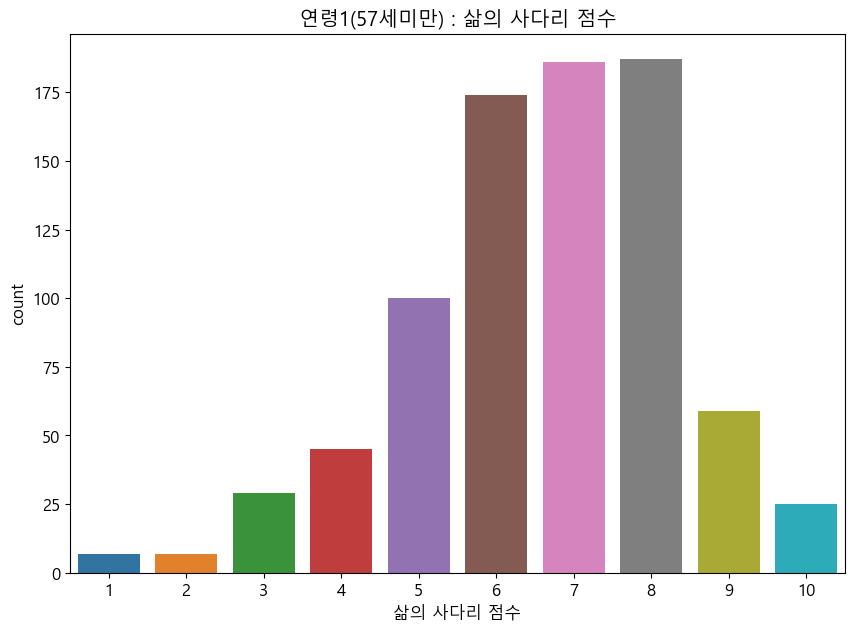

In [93]:
plt.figure()
sb.countplot(data=data[data['연령_구분'] ==1], x='삶의 사다리 점수')
plt.title('연령1(57세미만) : 삶의 사다리 점수')
plt.show()
plt.close()

In [94]:
data[data['연령_구분']==2].describe()

,근로유형,삶의 사다리 점수,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,성별,교육수준,연령,연령_구분
count,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.0
mean,2.311611,6.159953,3.123223,3.028436,3.566351,3.758294,3.392180,3.681280,3.264218,1.578199,4.245261,65.918246,2.0
std,1.395233,1.900055,0.967555,0.889718,0.658266,0.734421,0.686411,0.677782,0.740363,0.494140,1.315223,4.709013,0.0
min,1.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,57.000000,2.0
25%,1.000000,5.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,62.000000,2.0
50%,2.000000,6.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,66.000000,2.0
75%,4.000000,8.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,5.000000,70.000000,2.0
max,4.000000,10.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,2.000000,7.000000,73.000000,2.0


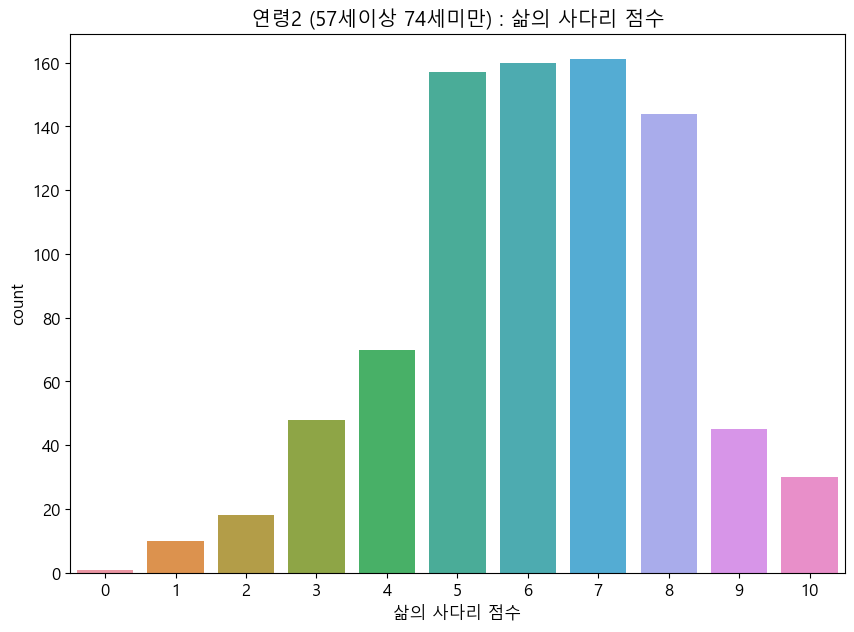

In [95]:
plt.figure()
sb.countplot(data=data[data['연령_구분'] ==2], x='삶의 사다리 점수')
plt.title('연령2 (57세이상 74세미만) : 삶의 사다리 점수')
plt.show()
plt.close()

In [96]:
data[data['연령_구분']==3].describe()

,근로유형,삶의 사다리 점수,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,성별,교육수준,연령,연령_구분
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.00000,765.000000,765.000000,765.000000,765.0
mean,2.883660,5.915033,2.684967,2.951634,3.600000,3.722876,3.324183,3.590850,3.20915,1.819608,3.364706,77.850980,3.0
std,1.369376,1.833186,0.927388,0.821194,0.617799,0.642363,0.678390,0.687335,0.70945,0.384765,1.118179,2.350507,0.0
min,1.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000,1.000000,2.000000,74.000000,3.0
25%,1.000000,5.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.00000,2.000000,3.000000,76.000000,3.0
50%,4.000000,6.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.00000,2.000000,3.000000,78.000000,3.0
75%,4.000000,7.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,2.000000,4.000000,80.000000,3.0
max,4.000000,10.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.00000,2.000000,7.000000,81.000000,3.0


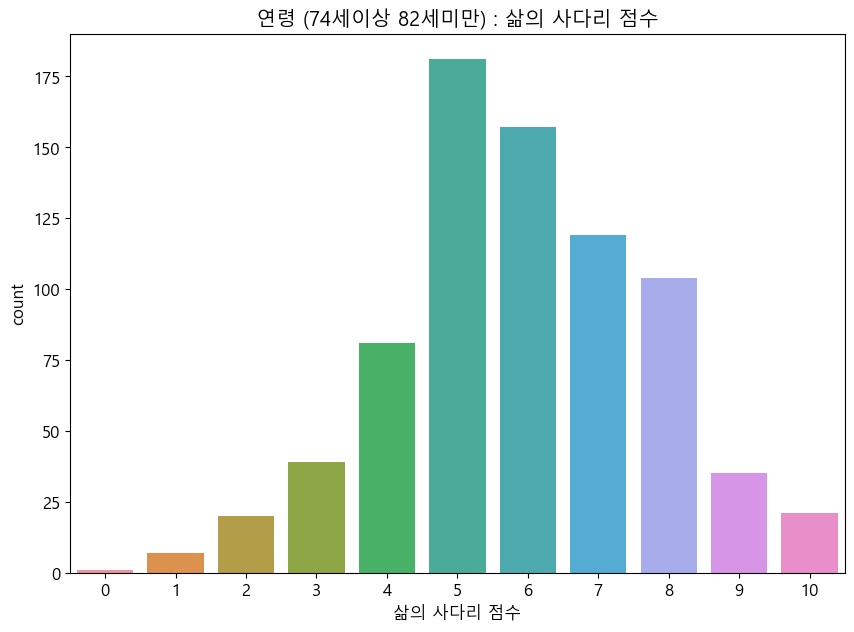

In [97]:
plt.figure()
sb.countplot(data=data[data['연령_구분'] ==3], x='삶의 사다리 점수')
plt.title('연령 (74세이상 82세미만) : 삶의 사다리 점수')
plt.show()
plt.close()

In [99]:
data[data['연령_구분']==4].describe()

,근로유형,삶의 사다리 점수,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,성별,교육수준,연령,연령_구분
count,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.00000,906.000000,906.000000,906.000000,906.0
mean,3.330022,5.801325,2.548565,3.011038,3.580574,3.759382,3.253863,3.469095,3.15894,1.835541,2.964680,86.376380,4.0
std,1.191277,1.765300,0.893416,0.765188,0.602589,0.608907,0.657814,0.669489,0.69498,0.370896,1.050582,3.358942,0.0
min,1.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000,1.000000,2.000000,82.000000,4.0
25%,4.000000,5.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,2.000000,2.000000,84.000000,4.0
50%,4.000000,6.000000,2.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.00000,2.000000,3.000000,86.000000,4.0
75%,4.000000,7.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,2.000000,3.000000,88.000000,4.0
max,4.000000,10.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.00000,2.000000,7.000000,101.000000,4.0


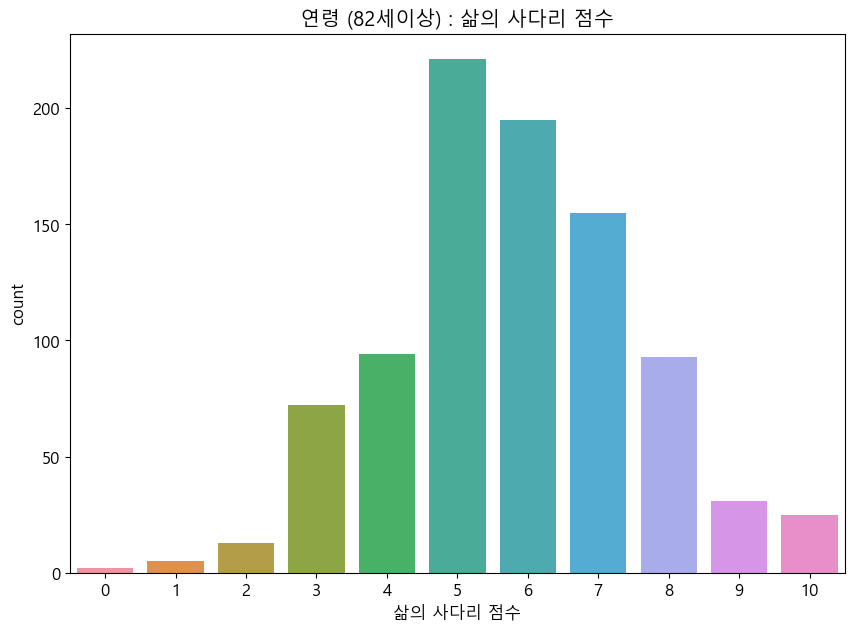

In [98]:
plt.figure()
sb.countplot(data=data[data['연령_구분'] ==4], x='삶의 사다리 점수')
plt.title('연령 (82세이상) : 삶의 사다리 점수')
plt.show()
plt.close()

### 연령

#### 연령과 삶의 만족도 사이의 관련성

In [52]:
# 서열척도
data[['삶의 사다리 점수','연령_구분']].corr(method='spearman')

,삶의 사다리 점수,연령_구분
삶의 사다리 점수,1.000000,-0.181026
연령_구분,-0.181026,1.000000


In [54]:
# 카이제곱검정(독립성)
chi2.chi2_try(data[["삶의 사다리 점수",'연령_구분']])["type4"][0]["pvalue"]

3.1953872269176074e-19

> 독립적이지 않다

#### 연령별 삶의 사다리 점수와의 관계

> 분석방법 : <br>
회귀계수의 pvalue가 0.05보다 높으면 높은 순으로 해당 column을 제거하고 다시 분석 <br>
만약 남은 column은 최소 2개를 유지

In [56]:
# 모듈 적용
연령 = Allogit.Lgt(data, '연령_구분')

Optimization terminated successfully.
         Current function value: 0.564083
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.565167
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.566388
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.619588
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.620592
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.621618
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.623238
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.624966
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.628355
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603530
  

##### 연령 1 (57세 미만)

|구분|기준(평균)|유효독립변수|
|---|----|----|
|최상위|7.83|건강만족도, 가족관계만족도, 직업만족도|
|중상위|6.60|건강만족도, 가족수입만족도, 가족관계만족도, 직업만족도, 사회적친분관계만족도, 여가생활만족도|
|최하위|5.06|건강만족도, 주거환경만족도, 가족관계만족도, 직업만족도|


중상위

In [57]:
result=pd.merge(연령[1]["중상위"][0].params.to_frame(),연령[1]["중상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("중상위","coef"),("중상위","pvalue")])),inplace=True)
print('평균:',연령[1]["중상위"][1])
result

평균: 6.6068376068376065


,"(중상위, coef)","(중상위, pvalue)"
const,-9.064872,2.218849e-31
(가)건강 만족도,0.303628,3.079838e-03
(나)가족의 수입 만족도,0.349284,1.658692e-03
(라)가족관계 만족도,0.448194,2.831041e-03
(마)직업 만족도,0.378037,7.093828e-03
(바)사회적 친분관계 만족도,0.635721,1.457137e-04
(사)여가생활 만족도,0.502490,9.938797e-05


최상위

In [58]:
result=pd.merge(연령[1]["최상위"][0].params.to_frame(),연령[1]["최상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최상위","coef"),("최상위","pvalue")])),inplace=True)
print('평균:',연령[1]["최상위"][1])
result

평균: 7.831509846827133


,"(최상위, coef)","(최상위, pvalue)"
const,-4.609483,0.000002
(가)건강 만족도,0.278883,0.032455
(라)가족관계 만족도,0.430027,0.021583
(마)직업 만족도,0.595584,0.000854


최하위

In [59]:
result=pd.merge(연령[1]["최하위"][0].params.to_frame(),연령[1]["최하위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최하위","coef"),("최하위","pvalue")])),inplace=True)
print('평균:',연령[1]["최하위"][1])
result

평균: 5.060773480662983


,"(최하위, coef)","(최하위, pvalue)"
const,-6.441011,8.845207e-13
(가)건강 만족도,0.612764,7.912401e-06
(다)주거 환경 만족도,0.390259,2.585763e-02
(라)가족관계 만족도,0.532677,3.791971e-03
(마)직업 만족도,0.360555,4.191560e-02


##### 연령 2 (57세이상 74세 미만)


|구분|기준(평균)|유효독립변수|
|---|----|----|
|최상위|7.85|건강만족도, 직업만족도|
|중상위|6.15|건강만족도, 가족수입만족도, 가족관계만족도, 직업만족도, 사회적친분관계만족도, 여가생활만족도|
|최하위|4.77|건강만족도, 주거환경만족도, 가족관계만족도, 직업만족도, 여가생활만족도|

In [60]:
result=pd.merge(연령[2]["중상위"][0].params.to_frame(),연령[2]["중상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("중상위","coef"),("중상위","pvalue")])),inplace=True)
print('평균:',연령[2]["중상위"][1])
result

평균: 6.159952606635071


,"(중상위, coef)","(중상위, pvalue)"
const,-9.978746,7.043182e-38
(가)건강 만족도,0.376456,9.086745e-05
(나)가족의 수입 만족도,0.301209,5.733046e-03
(라)가족관계 만족도,0.511241,3.032887e-04
(마)직업 만족도,0.512919,7.662303e-04
(바)사회적 친분관계 만족도,0.650392,1.474985e-04
(사)여가생활 만족도,0.451196,6.694513e-04


In [61]:
result=pd.merge(연령[2]["최상위"][0].params.to_frame(),연령[2]["최상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최상위","coef"),("최상위","pvalue")])),inplace=True)
print('평균:',연령[2]["최상위"][1])
result

평균: 7.852631578947369


,"(최상위, coef)","(최상위, pvalue)"
const,-4.285710,5.040125e-07
(가)건강 만족도,0.315353,1.313540e-02
(마)직업 만족도,0.947436,1.234432e-05


In [62]:
result=pd.merge(연령[2]["최하위"][0].params.to_frame(),연령[2]["최하위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최하위","coef"),("최하위","pvalue")])),inplace=True)
print('평균:',연령[2]["최하위"][1])
result

평균: 4.773706896551724


,"(최하위, coef)","(최하위, pvalue)"
const,-5.878995,1.419959e-13
(가)건강 만족도,0.482039,2.080078e-04
(다)주거 환경 만족도,0.342532,3.348697e-02
(라)가족관계 만족도,0.358843,2.119350e-02
(마)직업 만족도,0.417702,2.491516e-02
(사)여가생활 만족도,0.575968,1.261239e-03


##### 연령 3 (74세이상 82세미만)


|구분|기준(평균)|유효독립변수|
|---|----|----|
|최상위|7.18|가족수입만족도, 사회적 친분관계 만족도|
|중상위|5.91|건강만족도, 주거환경만족도, 가족관계만족도, 직업만족도, 여가생활만족도|
|최하위|4.23|건강만족도, 가족관계만족도|

In [63]:
result=pd.merge(연령[3]["중상위"][0].params.to_frame(),연령[3]["중상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("중상위","coef"),("중상위","pvalue")])),inplace=True)
print('평균:',연령[3]["중상위"][1])
result

평균: 5.915032679738562


,"(중상위, coef)","(중상위, pvalue)"
const,-7.469693,1.611744e-24
(가)건강 만족도,0.437629,6.935316e-06
(다)주거 환경 만족도,0.438939,2.678076e-03
(라)가족관계 만족도,0.429615,3.137430e-03
(마)직업 만족도,0.319306,2.498441e-02
(사)여가생활 만족도,0.743138,2.205214e-08


In [64]:
result=pd.merge(연령[3]["최상위"][0].params.to_frame(),연령[3]["최상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최상위","coef"),("최상위","pvalue")])),inplace=True)
print('평균:',연령[3]["최상위"][1])
result

평균: 7.18348623853211


,"(최상위, coef)","(최상위, pvalue)"
const,-3.949046,3.770238e-07
(나)가족의 수입 만족도,0.438839,7.061161e-04
(바)사회적 친분관계 만족도,0.528785,4.530713e-03


In [65]:
result=pd.merge(연령[3]["최하위"][0].params.to_frame(),연령[3]["최하위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최하위","coef"),("최하위","pvalue")])),inplace=True)
print('평균:',연령[3]["최하위"][1])
result

평균: 4.23404255319149


,"(최하위, coef)","(최하위, pvalue)"
const,-4.483854,3.965739e-09
(가)건강 만족도,0.524223,2.542290e-04
(라)가족관계 만족도,0.978510,1.113842e-07


##### 연령 4 (82세이상)

|구분|기준(평균)|유효독립변수|
|---|----|----|
|최상위|7.07|가족수입만족도, 주거환경만족도, 직업만족도, 사회적친분관계만족도|
|중상위|5.80|건강만족도, 가족수입만족도, 가족관계만족도, 사회적친분관계만족도, 여가생활만족도|
|최하위|4.24|가족수입만족도, 가족관계만족도|

In [66]:
result=pd.merge(연령[4]["중상위"][0].params.to_frame(),연령[4]["중상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("중상위","coef"),("중상위","pvalue")])),inplace=True)
print('평균:',연령[4]["중상위"][1])
result

평균: 5.801324503311259


,"(중상위, coef)","(중상위, pvalue)"
const,-7.436361,2.489096e-29
(가)건강 만족도,0.436304,4.218651e-06
(나)가족의 수입 만족도,0.461787,2.734577e-05
(라)가족관계 만족도,0.514443,2.206654e-04
(바)사회적 친분관계 만족도,0.579192,4.940359e-05
(사)여가생활 만족도,0.389232,4.380461e-03


In [67]:
result=pd.merge(연령[4]["최상위"][0].params.to_frame(),연령[4]["최상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최상위","coef"),("최상위","pvalue")])),inplace=True)
print('평균:',연령[4]["최상위"][1])
result

평균: 7.070140280561122


,"(최상위, coef)","(최상위, pvalue)"
const,-7.461788,3.757009e-10
(나)가족의 수입 만족도,0.454524,1.485615e-03
(다)주거 환경 만족도,0.545060,2.649869e-02
(마)직업 만족도,0.410929,2.801210e-02
(바)사회적 친분관계 만족도,0.441538,3.153358e-02


In [68]:
result=pd.merge(연령[4]["최하위"][0].params.to_frame(),연령[4]["최하위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최하위","coef"),("최하위","pvalue")])),inplace=True)
print('평균:',연령[4]["최하위"][1])
result

평균: 4.245700245700245


,"(최하위, coef)","(최하위, pvalue)"
const,-3.543926,1.652640e-07
(나)가족의 수입 만족도,0.650089,3.673685e-05
(라)가족관계 만족도,0.538793,1.617563e-03


**********************

In [101]:
data[data['근로유형']==1].describe()

,근로유형,삶의 사다리 점수,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,성별,교육수준,연령,연령_구분
count,1330.0,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000
mean,1.0,6.559398,3.378947,3.196241,3.567669,3.904511,3.577444,3.806767,3.413534,1.555639,4.798496,58.488722,1.998496
std,0.0,1.749945,0.906050,0.855110,0.635310,0.641476,0.622214,0.600564,0.673343,0.497082,1.670349,19.501892,1.029291
min,1.0,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,20.000000,1.000000
25%,1.0,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,1.000000,3.000000,40.000000,1.000000
50%,1.0,7.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,5.000000,62.000000,2.000000
75%,1.0,8.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,6.000000,76.000000,3.000000
max,1.0,10.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,2.000000,7.000000,96.000000,4.000000


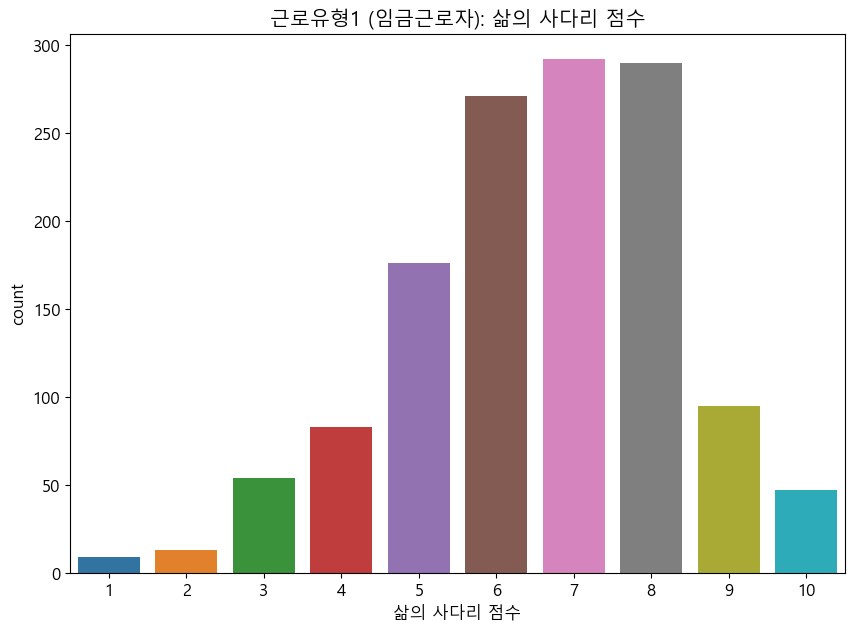

In [102]:
plt.figure()
sb.countplot(data=data[data['근로유형'] ==1], x='삶의 사다리 점수')
plt.title('근로유형1 (임금근로자): 삶의 사다리 점수')
plt.show()
plt.close()

In [103]:
data[data['근로유형']==2].describe()

,근로유형,삶의 사다리 점수,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,성별,교육수준,연령,연령_구분
count,352.0,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,2.0,6.457386,3.096591,3.028409,3.647727,3.838068,3.491477,3.778409,3.269886,1.622159,4.099432,66.267045,2.377841
std,0.0,1.551913,0.865146,0.889502,0.590326,0.608042,0.649292,0.576649,0.694629,0.485538,1.590140,16.876871,1.044245
min,2.0,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,20.000000,1.000000
25%,2.0,5.000000,2.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,1.000000,3.000000,57.000000,2.000000
50%,2.0,6.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,70.000000,2.000000
75%,2.0,8.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,5.000000,79.000000,3.000000
max,2.0,10.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,2.000000,7.000000,92.000000,4.000000


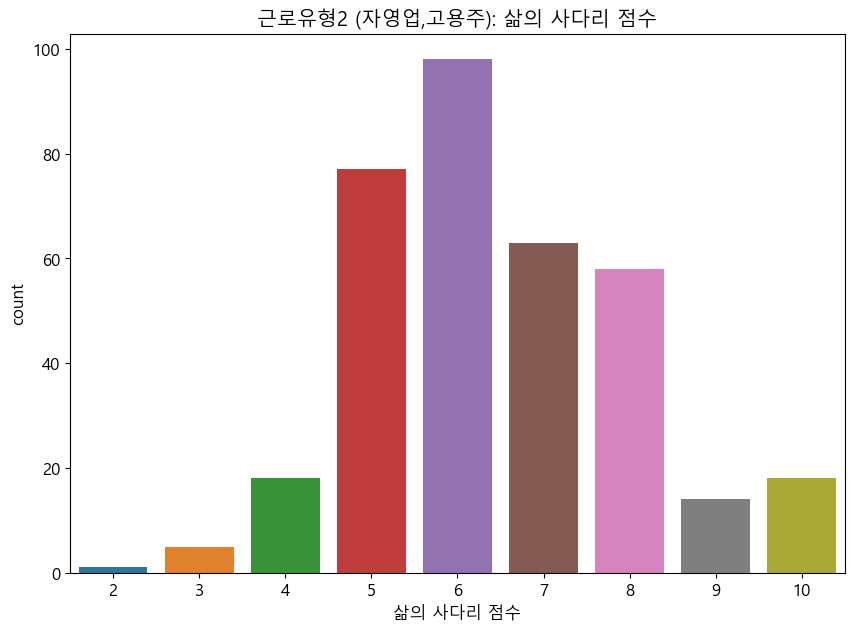

In [104]:
plt.figure()
sb.countplot(data=data[data['근로유형'] ==2], x='삶의 사다리 점수')
plt.title('근로유형2 (자영업,고용주): 삶의 사다리 점수')
plt.show()
plt.close()

In [105]:
data[data['근로유형']==4].describe()

,근로유형,삶의 사다리 점수,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,성별,교육수준,연령,연령_구분
count,1652.0,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000
mean,4.0,5.686441,2.576271,2.921308,3.551453,3.682203,3.147094,3.440678,3.109564,1.737893,3.644673,75.407990,2.984867
std,0.0,1.844923,0.940182,0.813935,0.643010,0.691804,0.671861,0.709538,0.729731,0.439913,1.448996,14.563194,1.033837
min,4.0,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,21.000000,1.000000
25%,4.0,5.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,70.000000,2.000000
50%,4.0,6.000000,2.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,2.000000,3.000000,80.000000,3.000000
75%,4.0,7.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,5.000000,85.000000,4.000000
max,4.0,10.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,2.000000,7.000000,101.000000,4.000000


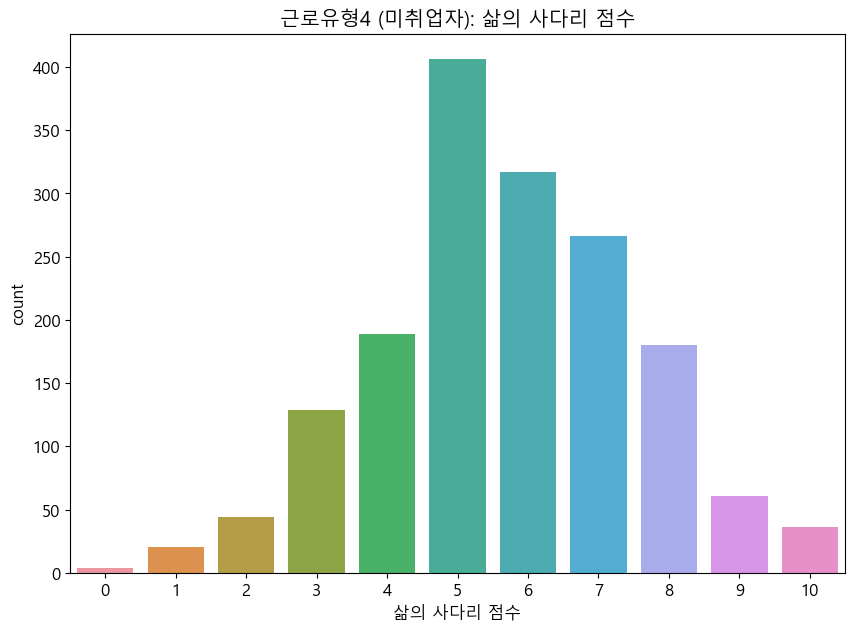

In [106]:
plt.figure()
sb.countplot(data=data[data['근로유형'] ==4], x='삶의 사다리 점수')
plt.title('근로유형4 (미취업자): 삶의 사다리 점수')
plt.show()
plt.close()

### 근로유형

#### 근로유형과 삶의 만족도 사이의 연관성

In [70]:
# 카이제곱검정(독립성)
chi2.chi2_try(data[["삶의 사다리 점수",'근로유형']])["type4"][0]["pvalue"]

2.8004248616211663e-40

> 독립적이지 않다

#### 근로유형 별 삶의 사다리 점수 간의 관계

> 분석방법 : <br>
회귀계수의 pvalue가 0.05보다 높으면 높은 순으로 해당 column을 제거하고 다시 분석 <br>
만약 남은 column은 최소 2개를 유지

In [71]:
# 모듈 적용
근로유형 = Allogit.Lgt(data, '근로유형')

Optimization terminated successfully.
         Current function value: 0.547676
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.592087
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.592144
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.592221
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.592351
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.593818
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.614370
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.614539
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.616299
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.618530
  

#### 근로유형1  (임금근로자)

|구분|기준(평균)|유효독립변수|
|---|----|----|
|최상위|7.85|건강만족도, 주거환경만족도, 가족관계만족도, 직업만족도, 사회적친분관계만족도|
|중상위|6.55|건강만족도, 가족수입만족도, 가족관계만족도, 직업만족도, 사회적친분관계만족도, 여가생활만족도|
|최하위|5.00|건강만족도, 가족수입만족도, 가족관계만족도, 여가생활만족도|

중상위

In [73]:
result=pd.merge(근로유형[1]["중상위"][0].params.to_frame(),근로유형[1]["중상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("중상위","coef"),("중상위","pvalue")])),inplace=True)
print('평균:',근로유형[1]["중상위"][1])
result

평균: 6.559398496240601


,"(중상위, coef)","(중상위, pvalue)"
const,-8.893496,1.189279e-44
(가)건강 만족도,0.344747,6.333349e-06
(나)가족의 수입 만족도,0.258273,2.926885e-03
(라)가족관계 만족도,0.558525,1.857158e-06
(마)직업 만족도,0.280575,1.743231e-02
(바)사회적 친분관계 만족도,0.582464,9.892537e-06
(사)여가생활 만족도,0.493322,2.816560e-06


최상위

In [74]:
result=pd.merge(근로유형[1]["최상위"][0].params.to_frame(),근로유형[1]["최상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최상위","coef"),("최상위","pvalue")])),inplace=True)
print('평균:',근로유형[1]["최상위"][1])
result

평균: 7.857734806629834


,"(최상위, coef)","(최상위, pvalue)"
const,-6.668041,4.265465e-11
(가)건강 만족도,0.243444,1.214715e-02
(다)주거 환경 만족도,0.333812,2.592742e-02
(라)가족관계 만족도,0.429689,8.818183e-03
(마)직업 만족도,0.459488,4.748289e-03
(바)사회적 친분관계 만족도,0.373167,4.574321e-02


최하위

In [75]:
result=pd.merge(근로유형[1]["최하위"][0].params.to_frame(),근로유형[1]["최하위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최하위","coef"),("최하위","pvalue")])),inplace=True)
print('평균:',근로유형[1]["최하위"][1])
result

평균: 5.008250825082508


,"(최하위, coef)","(최하위, pvalue)"
const,-5.105340,4.583905e-15
(가)건강 만족도,0.418092,7.814980e-05
(나)가족의 수입 만족도,0.335786,3.635406e-03
(라)가족관계 만족도,0.349406,1.514276e-02
(사)여가생활 만족도,0.409932,3.280928e-03


#### 근로유형2 (자영업, 고용주)

|구분|기준(평균)|유효독립변수|
|---|----|----|
|최상위|7.91|가족수입만족도, 직업만족도|
|중상위|6.45|건강만족도, 가족수입만족도, 직업만족도, 여가생활만족도|
|최하위|5.33|건강만족도, 가족수입만족도|

중상위

In [76]:
result=pd.merge(근로유형[2]["중상위"][0].params.to_frame(),근로유형[2]["중상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("중상위","coef"),("중상위","pvalue")])),inplace=True)
print('평균:',근로유형[2]["중상위"][1])
result

평균: 6.457386363636363


,"(중상위, coef)","(중상위, pvalue)"
const,-7.304047,4.160572e-14
(가)건강 만족도,0.471743,1.342053e-03
(나)가족의 수입 만족도,0.574768,1.597539e-04
(마)직업 만족도,0.596162,8.017580e-03
(사)여가생활 만족도,0.515392,7.509921e-03


최상위

In [77]:
result=pd.merge(근로유형[2]["최상위"][0].params.to_frame(),근로유형[2]["최상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최상위","coef"),("최상위","pvalue")])),inplace=True)
print('평균:',근로유형[2]["최상위"][1])
result

평균: 7.915032679738562


,"(최상위, coef)","(최상위, pvalue)"
const,-3.729256,0.005382
(나)가족의 수입 만족도,0.294616,0.158613
(마)직업 만족도,0.835046,0.016870


최하위

In [78]:
result=pd.merge(근로유형[2]["최하위"][0].params.to_frame(),근로유형[2]["최하위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최하위","coef"),("최하위","pvalue")])),inplace=True)
print('평균:',근로유형[2]["최하위"][1])
result

평균: 5.336683417085427


,"(최하위, coef)","(최하위, pvalue)"
const,-3.831471,0.000310
(가)건강 만족도,0.410711,0.015626
(라)가족관계 만족도,0.696835,0.005588


#### 근로유형 4 (미취업자)

|구분|기준(평균)|유효독립변수|
|---|----|----|
|최상위|7.10|건강만족도, 직업만족도, 사회적친분관계만족도|
|중상위|5.68|건강만족도, 가족수입만족도, 주거환경만족도, 가족관계만족도, 직업만족도, 사회적친분관계만족도, 여가생활만족도|
|최하위|4.14|건강만족도, 가족수입만족도, 가족관계만족도, 여가생활만족도|

중상위

In [79]:
result=pd.merge(근로유형[4]["중상위"][0].params.to_frame(),근로유형[4]["중상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("중상위","coef"),("중상위","pvalue")])),inplace=True)
print('평균:',근로유형[4]["중상위"][1])
result

평균: 5.686440677966102


,"(중상위, coef)","(중상위, pvalue)"
const,-8.671703,1.198559e-63
(가)건강 만족도,0.389271,9.678143e-09
(나)가족의 수입 만족도,0.309267,1.381922e-04
(다)주거 환경 만족도,0.356536,4.430405e-04
(라)가족관계 만족도,0.412590,3.554395e-05
(마)직업 만족도,0.315710,2.125929e-03
(바)사회적 친분관계 만족도,0.418369,4.509994e-05
(사)여가생활 만족도,0.522014,8.411211e-08


최상위

In [80]:
result=pd.merge(근로유형[4]["최상위"][0].params.to_frame(),근로유형[4]["최상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최상위","coef"),("최상위","pvalue")])),inplace=True)
print('평균:',근로유형[4]["최상위"][1])
result

평균: 7.108139534883721


,"(최상위, coef)","(최상위, pvalue)"
const,-4.945855,1.278305e-15
(가)건강 만족도,0.289366,5.116434e-04
(마)직업 만족도,0.521778,6.524780e-05
(바)사회적 친분관계 만족도,0.421105,3.301151e-03


최하위

In [81]:
result=pd.merge(근로유형[4]["최하위"][0].params.to_frame(),근로유형[4]["최하위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최하위","coef"),("최하위","pvalue")])),inplace=True)
print('평균:',근로유형[4]["최하위"][1])
result

평균: 4.142676767676767


,"(최하위, coef)","(최하위, pvalue)"
const,-5.033055,4.963571e-21
(가)건강 만족도,0.217385,2.380675e-02
(나)가족의 수입 만족도,0.476105,2.947986e-05
(라)가족관계 만족도,0.574412,1.456060e-06
(사)여가생활 만족도,0.471841,1.838054e-04


**************

In [107]:
data[data['교육수준']==2].describe()

,근로유형,삶의 사다리 점수,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,성별,교육수준,연령,연령_구분
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.0,514.000000,514.000000
mean,3.192607,5.560311,2.486381,2.873541,3.531128,3.643969,3.198444,3.416342,3.058366,1.929961,2.0,83.085603,3.556420
std,1.265783,1.896252,0.900947,0.770787,0.648889,0.669360,0.654507,0.682420,0.703997,0.255461,0.0,6.589944,0.650182
min,1.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.0,58.000000,2.000000
25%,2.000000,4.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.0,80.000000,3.000000
50%,4.000000,5.000000,2.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,2.000000,2.0,84.000000,4.000000
75%,4.000000,7.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.0,87.000000,4.000000
max,4.000000,10.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,2.000000,2.0,101.000000,4.000000


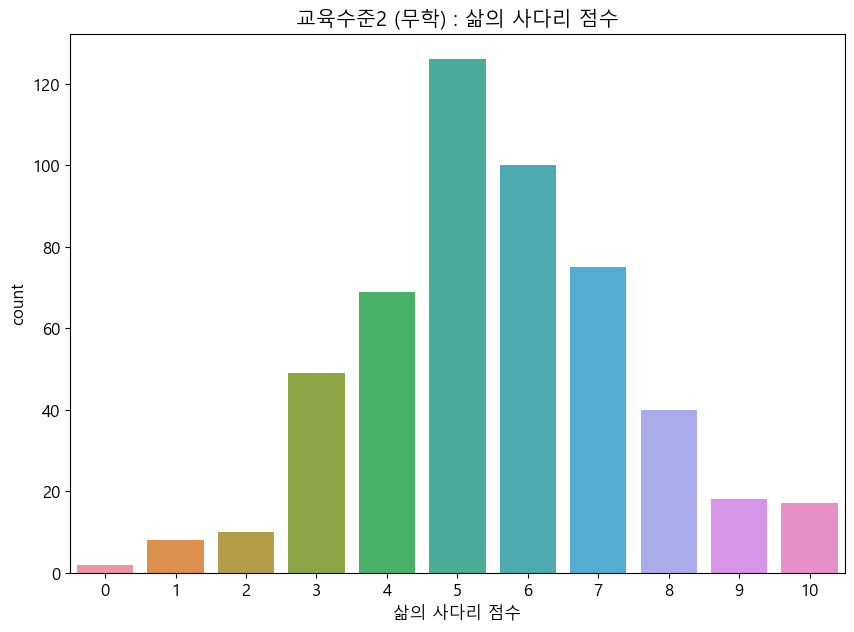

In [108]:
plt.figure()
sb.countplot(data=data[data['교육수준']==2], x='삶의 사다리 점수')
plt.title('교육수준2 (무학) : 삶의 사다리 점수')
plt.show()
plt.close()

In [109]:
data[data['교육수준']==4].describe()

,근로유형,삶의 사다리 점수,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,성별,교육수준,연령,연령_구분
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.0,422.000000,422.000000
mean,2.836493,6.000000,2.954976,3.018957,3.587678,3.751185,3.348341,3.609005,3.236967,1.672986,4.0,72.853081,2.649289
std,1.391967,1.793363,0.965122,0.866160,0.632185,0.687303,0.715943,0.647461,0.706776,0.469679,0.0,9.854631,0.847092
min,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,4.0,32.000000,1.000000
25%,1.000000,5.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,4.0,66.000000,2.000000
50%,4.000000,6.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,2.000000,4.0,73.000000,2.000000
75%,4.000000,7.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.0,81.000000,3.000000
max,4.000000,10.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,2.000000,4.0,96.000000,4.000000


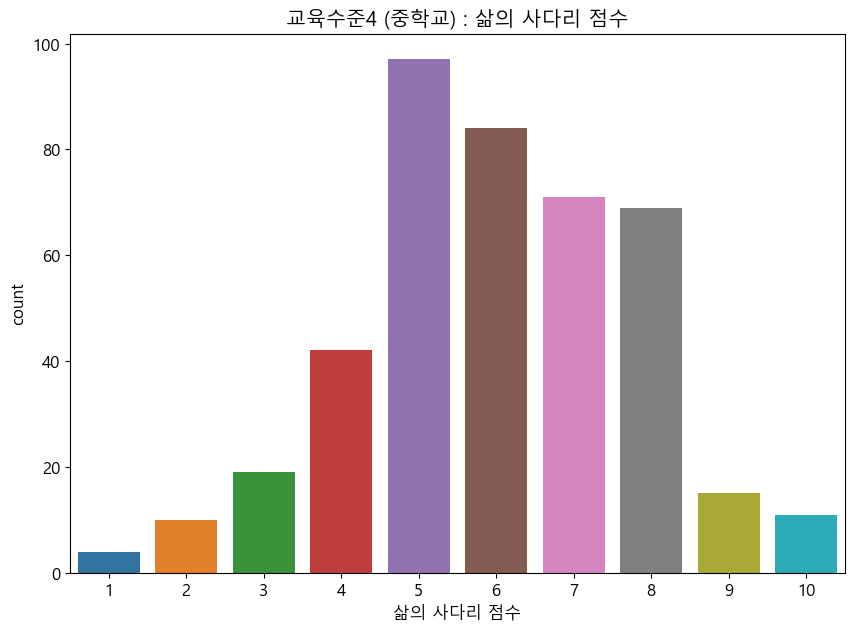

In [110]:
plt.figure()
sb.countplot(data=data[data['교육수준']==4], x='삶의 사다리 점수')
plt.title('교육수준4 (중학교) : 삶의 사다리 점수')
plt.show()
plt.close()

In [111]:
data[data['교육수준']==5].describe()

,근로유형,삶의 사다리 점수,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,성별,교육수준,연령,연령_구분
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.0,636.000000,636.000000
mean,2.267296,6.273585,3.169811,3.084906,3.567610,3.784591,3.382075,3.669811,3.275157,1.424528,5.0,60.449686,1.982704
std,1.412297,1.857268,0.976625,0.900931,0.652183,0.691329,0.714480,0.671888,0.745430,0.494660,0.0,16.521777,0.959667
min,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,5.0,20.000000,1.000000
25%,1.000000,5.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,5.0,51.000000,1.000000
50%,1.000000,6.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,5.0,62.000000,2.000000
75%,4.000000,8.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,5.0,73.000000,2.000000
max,4.000000,10.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,2.000000,5.0,96.000000,4.000000


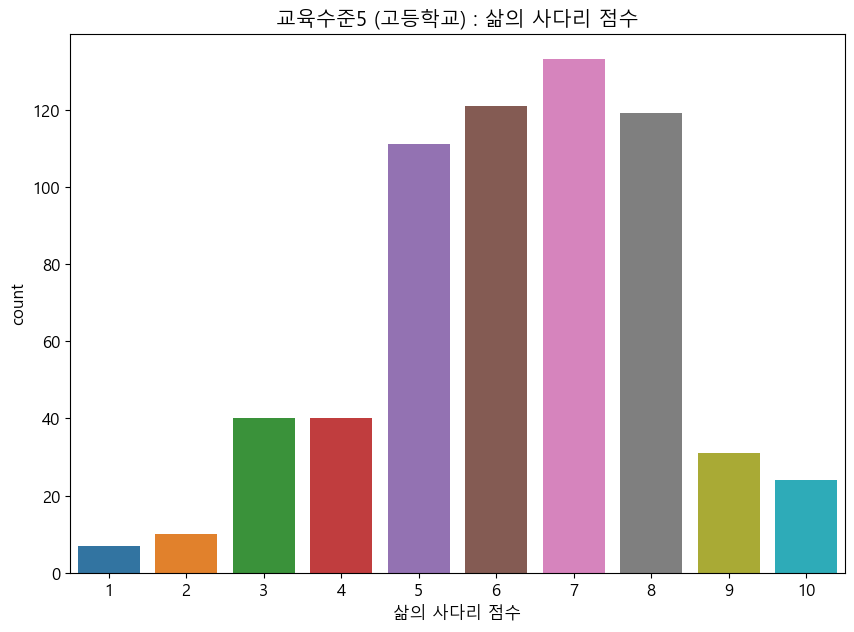

In [112]:
plt.figure()
sb.countplot(data=data[data['교육수준']==5], x='삶의 사다리 점수')
plt.title('교육수준5 (고등학교) : 삶의 사다리 점수')
plt.show()
plt.close()

In [113]:
data[data['교육수준']==6].describe()

,근로유형,삶의 사다리 점수,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,성별,교육수준,연령,연령_구분
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.0,220.000000,220.000000
mean,1.972727,6.563636,3.409091,3.222727,3.563636,3.909091,3.509091,3.740909,3.404545,1.381818,6.0,42.704545,1.231818
std,1.334194,1.635939,0.878931,0.849621,0.641449,0.612584,0.644548,0.627497,0.692410,0.486940,0.0,14.720190,0.578051
min,1.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,6.0,23.000000,1.000000
25%,1.000000,6.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,1.000000,6.0,31.000000,1.000000
50%,1.000000,7.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,6.0,39.000000,1.000000
75%,4.000000,8.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,6.0,51.250000,1.000000
max,4.000000,10.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,2.000000,6.0,89.000000,4.000000


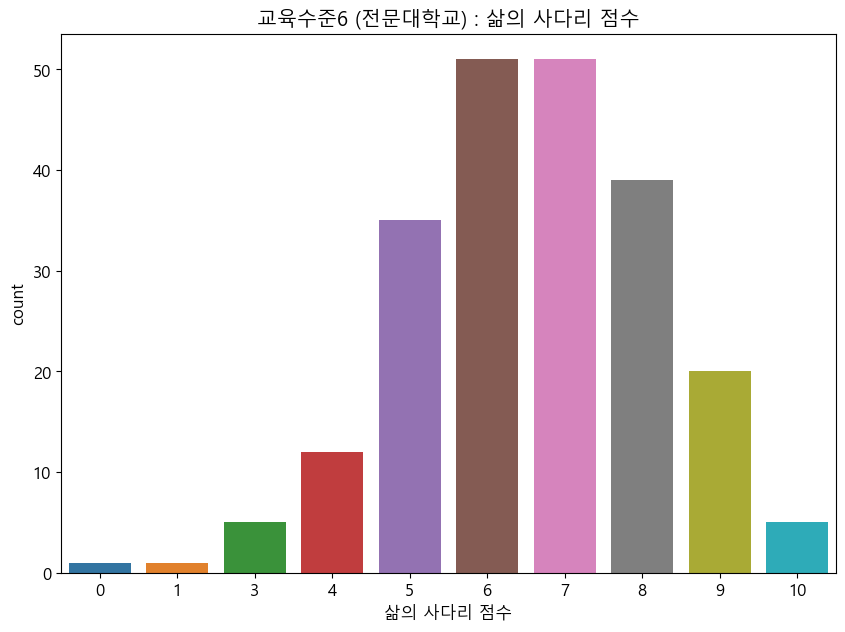

In [114]:
plt.figure()
sb.countplot(data=data[data['교육수준']==6], x='삶의 사다리 점수')
plt.title('교육수준6 (전문대학교) : 삶의 사다리 점수')
plt.show()
plt.close()

In [115]:
data[data['교육수준']==7].describe()

,근로유형,삶의 사다리 점수,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,성별,교육수준,연령,연령_구분
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.00000,501.000000,501.000000,501.000000,501.000000,501.0,501.000000,501.000000
mean,1.838323,6.840319,3.550898,3.267465,3.570858,3.98004,3.520958,3.848303,3.437126,1.357285,7.0,45.207585,1.363273
std,1.274287,1.676440,0.894374,0.907920,0.649206,0.72911,0.664876,0.651876,0.688868,0.479679,0.0,16.730715,0.737407
min,1.000000,1.000000,1.000000,1.000000,2.000000,2.00000,2.000000,2.000000,2.000000,1.000000,7.0,21.000000,1.000000
25%,1.000000,6.000000,3.000000,3.000000,3.000000,4.00000,3.000000,4.000000,3.000000,1.000000,7.0,31.000000,1.000000
50%,1.000000,7.000000,4.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,1.000000,7.0,41.000000,1.000000
75%,2.000000,8.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,2.000000,7.0,56.000000,1.000000
max,4.000000,10.000000,5.000000,5.000000,4.000000,5.00000,4.000000,5.000000,4.000000,2.000000,7.0,97.000000,4.000000


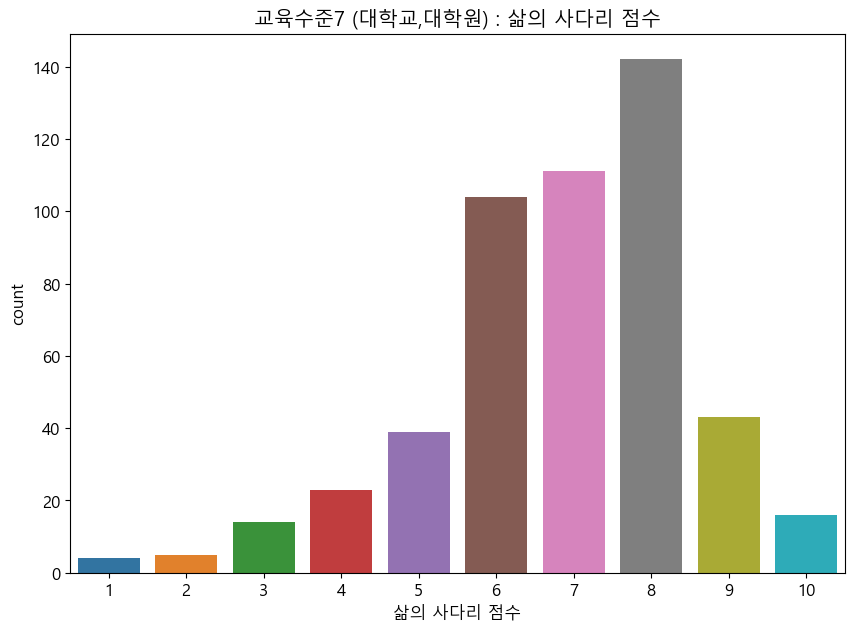

In [116]:
plt.figure()
sb.countplot(data=data[data['교육수준']==7], x='삶의 사다리 점수')
plt.title('교육수준7 (대학교,대학원) : 삶의 사다리 점수')
plt.show()
plt.close()

### 교육수준

##### 교육수준과 삶의 만족도 사이의 연관성

In [15]:
# 서열척도
data[['삶의 사다리 점수','교육수준']].corr(method='spearman')

,삶의 사다리 점수,교육수준
삶의 사다리 점수,1.000000,0.232986
교육수준,0.232986,1.000000


In [16]:
# 카이제곱검정(독립성)
chi2.chi2_try(data[["삶의 사다리 점수",'교육수준']])["type4"][0]["pvalue"]

9.068242536445476e-32

> 독립적이지 않다

##### 교육수준별 삶의 사다리 점수간의 관계

> 분석방법 : <br>
회귀계수의 pvalue가 0.05보다 높으면 높은 순으로 해당 column을 제거하고 다시 분석 <br>
만약 남은 column은 최소 2개를 유지

In [17]:
# 모듈 적용
교육수준 = Allogit.Lgt(data, '교육수준')

Optimization terminated successfully.
         Current function value: 0.553254
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.555247
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.557538
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.561872
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.648605
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.648816
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.649314
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.650114
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.653045
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.657150
  

##### 교육수준 2 : 무학

|구분|기준(평균)|유효독립변수|
|---|----|----|
|최상위|7.10|가족수입만족도, 사회적친분관계만족도|
|중상위|5.56|건강만족도, 가족수입만족도, 사회적친분관계만족도, 여가생활만족도|
|최하위|4.09|가족수입만족도, 주거환경만족도|

중상위

In [19]:
result=pd.merge(교육수준[2]["중상위"][0].params.to_frame(),교육수준[2]["중상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("중상위","coef"),("중상위","pvalue")])),inplace=True)
print('평균:',교육수준[2]["중상위"][1])
result

평균: 5.560311284046692


,"(중상위, coef)","(중상위, pvalue)"
const,-6.354932,3.174635e-19
(가)건강 만족도,0.576536,4.935974e-06
(나)가족의 수입 만족도,0.486149,7.103450e-04
(바)사회적 친분관계 만족도,0.625167,7.132104e-04
(사)여가생활 만족도,0.429370,1.425509e-02


최상위

In [20]:
result=pd.merge(교육수준[2]["최상위"][0].params.to_frame(),교육수준[2]["최상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최상위","coef"),("최상위","pvalue")])),inplace=True)
print('평균:',교육수준[2]["최상위"][1])
result

평균: 7.108


,"(최상위, coef)","(최상위, pvalue)"
const,-6.571894,1.663667e-07
(나)가족의 수입 만족도,0.875105,4.227774e-05
(바)사회적 친분관계 만족도,0.787632,6.253928e-03


최하위

In [21]:
result=pd.merge(교육수준[2]["최하위"][0].params.to_frame(),교육수준[2]["최하위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최하위","coef"),("최하위","pvalue")])),inplace=True)
print('평균:',교육수준[2]["최하위"][1])
result

평균: 4.09469696969697


,"(최하위, coef)","(최하위, pvalue)"
const,-2.937042,0.000053
(나)가족의 수입 만족도,0.690001,0.000453
(다)주거 환경 만족도,0.297056,0.129961


#### 교육수준 4 : 중학교

|구분|기준(평균)|유효독립변수|
|---|----|----|
|최상위|7.79|가족수입만족도, 직업만족도|
|중상위|6.00|건강만족도, 주거환경만족도, 직업만족도, 사회적친분관계만족도|
|최하위|4.83|건강만족도, 직업만족도, 가족관계만족도|

중상위

In [22]:
result=pd.merge(교육수준[4]["중상위"][0].params.to_frame(),교육수준[4]["중상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("중상위","coef"),("중상위","pvalue")])),inplace=True)
print('평균:',교육수준[4]["중상위"][1])
result

평균: 6.0


,"(중상위, coef)","(중상위, pvalue)"
const,-8.437494,1.990746e-15
(가)건강 만족도,0.296341,1.700898e-02
(다)주거 환경 만족도,0.584653,6.441249e-03
(마)직업 만족도,0.616620,1.649362e-03
(바)사회적 친분관계 만족도,0.775872,8.257791e-04


최상위

In [23]:
result=pd.merge(교육수준[4]["최상위"][0].params.to_frame(),교육수준[4]["최상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최상위","coef"),("최상위","pvalue")])),inplace=True)
print('평균:',교육수준[4]["최상위"][1])
result

평균: 7.795180722891566


,"(최상위, coef)","(최상위, pvalue)"
const,-2.874327,0.012515
(나)가족의 수입 만족도,0.281469,0.122037
(마)직업 만족도,0.613123,0.032543


최하위

In [24]:
result=pd.merge(교육수준[4]["최하위"][0].params.to_frame(),교육수준[4]["최하위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최하위","coef"),("최하위","pvalue")])),inplace=True)
print('평균:',교육수준[4]["최하위"][1])
result

평균: 4.8359375


,"(최하위, coef)","(최하위, pvalue)"
const,-4.506955,0.000002
(가)건강 만족도,0.407276,0.021763
(라)가족관계 만족도,0.543770,0.016897
(마)직업 만족도,0.785703,0.000582


#### 교육수준 5 : 고등학교

|구분|기준(평균)|유효독립변수|
|---|----|----|
|최상위|7.82|가족관계만족도, 직업만족도|
|중상위|6.27|건강만족도, 가족수입만족도, 가족관계만족도, 직업만족도,사회적친분관계만족도, 여가생활만족도|
|최하위|4.83|건강만족도, 가족수입만족도, 가족관계만족도, 여가생활만족도|


In [25]:
result=pd.merge(교육수준[5]["중상위"][0].params.to_frame(),교육수준[5]["중상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("중상위","coef"),("중상위","pvalue")])),inplace=True)
print('평균:',교육수준[5]["중상위"][1])
result

평균: 6.273584905660377


,"(중상위, coef)","(중상위, pvalue)"
const,-7.971771,8.620384e-24
(가)건강 만족도,0.371946,3.736275e-04
(나)가족의 수입 만족도,0.262130,2.276492e-02
(라)가족관계 만족도,0.428108,8.401742e-03
(마)직업 만족도,0.343833,2.679742e-02
(바)사회적 친분관계 만족도,0.510015,4.453146e-03
(사)여가생활 만족도,0.362898,1.104182e-02


In [26]:
result=pd.merge(교육수준[5]["최상위"][0].params.to_frame(),교육수준[5]["최상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최상위","coef"),("최상위","pvalue")])),inplace=True)
print('평균:',교육수준[5]["최상위"][1])
result

평균: 7.824104234527687


,"(최상위, coef)","(최상위, pvalue)"
const,-4.071515,0.000137
(라)가족관계 만족도,0.447633,0.045747
(마)직업 만족도,0.702589,0.000696


In [27]:
result=pd.merge(교육수준[5]["최하위"][0].params.to_frame(),교육수준[5]["최하위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최하위","coef"),("최하위","pvalue")])),inplace=True)
print('평균:',교육수준[5]["최하위"][1])
result

평균: 4.826747720364741


,"(최하위, coef)","(최하위, pvalue)"
const,-6.365368,1.309001e-11
(가)건강 만족도,0.467999,2.547244e-03
(나)가족의 수입 만족도,0.465892,7.155997e-03
(라)가족관계 만족도,0.668726,8.664228e-04
(사)여가생활 만족도,0.808223,7.759557e-05


#### 교육수준 6 : 전문대학교

|구분|기준(평균)|유효독립변수|
|---|----|----|
|최상위|7.82|주거환경만족도, 사회적친분관계만족도|
|중상위|6.56|건강만족도, 가족관계만족도, 직업만족도, 여가생활만족도|
|최하위|5.19|건강만족도, 주거환경만족도|

In [28]:
result=pd.merge(교육수준[6]["중상위"][0].params.to_frame(),교육수준[6]["중상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("중상위","coef"),("중상위","pvalue")])),inplace=True)
print('평균:',교육수준[6]["중상위"][1])
result

평균: 6.5636363636363635


,"(중상위, coef)","(중상위, pvalue)"
const,-9.427310,4.997413e-10
(가)건강 만족도,0.401476,3.400939e-02
(라)가족관계 만족도,1.077867,3.766684e-04
(사)여가생활 만족도,1.146627,5.584562e-06


In [29]:
result=pd.merge(교육수준[6]["최상위"][0].params.to_frame(),교육수준[6]["최상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최상위","coef"),("최상위","pvalue")])),inplace=True)
print('평균:',교육수준[6]["최상위"][1])
result

평균: 7.817391304347826


,"(최상위, coef)","(최상위, pvalue)"
const,-4.264837,0.029444
(다)주거 환경 만족도,0.561946,0.120883
(바)사회적 친분관계 만족도,0.623166,0.118344


In [30]:
result=pd.merge(교육수준[6]["최하위"][0].params.to_frame(),교육수준[6]["최하위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최하위","coef"),("최하위","pvalue")])),inplace=True)
print('평균:',교육수준[6]["최하위"][1])
result

평균: 5.190476190476191


,"(최하위, coef)","(최하위, pvalue)"
const,-3.884696,0.002402
(가)건강 만족도,0.364382,0.107971
(다)주거 환경 만족도,0.764576,0.012562


#### 교육수준 7 : 대학교, 대학원

|구분|기준(평균)|유효독립변수|
|---|----|----|
|최상위|7.88|건강만족도, 직업만족도|
|중상위|6.84|건강만족도, 가족관계만족도, 직업만족도, 여가생활만족도|
|최하위|5.11|건강만족도, 가족관계만족도, 직업만족도|

In [31]:
result=pd.merge(교육수준[7]["중상위"][0].params.to_frame(),교육수준[7]["중상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("중상위","coef"),("중상위","pvalue")])),inplace=True)
print('평균:',교육수준[7]["중상위"][1])
result

평균: 6.840319361277445


,"(중상위, coef)","(중상위, pvalue)"
const,-9.932521,8.343999e-23
(가)건강 만족도,0.490168,4.176774e-04
(나)가족의 수입 만족도,0.445126,2.335360e-03
(마)직업 만족도,0.432126,2.543542e-02
(바)사회적 친분관계 만족도,1.022166,7.670179e-06
(사)여가생활 만족도,0.547874,2.865501e-03


In [32]:
result=pd.merge(교육수준[7]["최상위"][0].params.to_frame(),교육수준[7]["최상위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최상위","coef"),("최상위","pvalue")])),inplace=True)
print('평균:',교육수준[7]["최상위"][1])
result

평균: 7.884615384615385


,"(최상위, coef)","(최상위, pvalue)"
const,-3.521750,0.000391
(가)건강 만족도,0.301784,0.068432
(마)직업 만족도,0.801506,0.000835


In [33]:
result=pd.merge(교육수준[7]["최하위"][0].params.to_frame(),교육수준[7]["최하위"][0].pvalues.to_frame(),right_index=True,left_index=True)
result.rename(columns=dict(zip(result.columns,[("최하위","coef"),("최하위","pvalue")])),inplace=True)
print('평균:',교육수준[7]["최하위"][1])
result

평균: 5.116402116402116


,"(최하위, coef)","(최하위, pvalue)"
const,-6.468334,1.739787e-08
(가)건강 만족도,0.727041,1.619591e-04
(라)가족관계 만족도,0.728220,3.079104e-03
(마)직업 만족도,0.551056,2.306483e-02
